✅ Pandas لود شد – تعداد ردیف: 506
      crim    zn  indus  chas    nox     rm    age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  

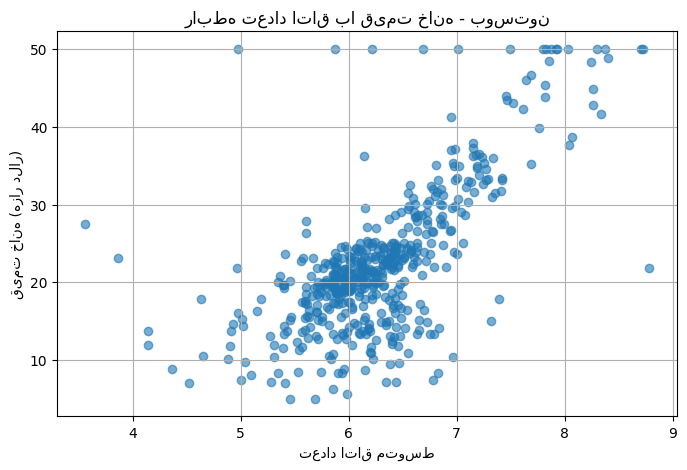


گروه‌بندی Pandas: 0.0034 ثانیه
گروه‌بندی Polars: 0.0013 ثانیه → 2.6 برابر سریع‌تر!


In [3]:
import pandas as pd
import polars as pl
import time
import matplotlib.pyplot as plt

# یکی از این ۳ تا رو انتخاب کن
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"  # اینو اول امتحان کن

# Pandas
start = time.time()
df_pd = pd.read_csv(url)
pandas_time = time.time() - start

print("✅ Pandas لود شد – تعداد ردیف:", len(df_pd))
print(df_pd.head(10))

# Polars
!pip install polars -q
start = time.time()
df_pl = pl.read_csv(url)
polars_time = time.time() - start

print("\n✅ Polars لود شد – تعداد ردیف:", len(df_pl))
print(df_pl.head(10))

print(f"\n🚀 Polars تقریباً {pandas_time/polars_time:.1f} برابر سریع‌تر بود!")  # اینو اول امتحان کن

# Pandas
start = time.time()
df_pd = pd.read_csv(url)
pandas_time = time.time() - start

print("✅ Pandas لود شد – تعداد ردیف:", len(df_pd))
print(df_pd.head(10))

# Polars
!pip install polars -q
start = time.time()
df_pl = pl.read_csv(url)
polars_time = time.time() - start

print("\n✅ Polars لود شد – تعداد ردیف:", len(df_pl))
print(df_pl.head(10))

print(f"\n🚀 Polars تقریباً {pandas_time/polars_time:.1f} برابر سریع‌تر بود!")

# ۱. ۱۰ ردیف اول (هر دو)
print("Pandas:\n", df_pd.head(10))
print("Polars:\n", df_pl.head(10))

# ۲. آمار کلی
print("\nآمار کلی با Pandas:")
print(df_pd.describe())

# ۳. ۵ تا تحلیل جالب (با Pandas و Polars هر دو انجام بده)

# ۳.۱ گرون‌ترین و ارزون‌ترین خانه
print("گران‌ترین خانه:", df_pd['medv'].max(), "هزار دلار")
print("ارزون‌ترین خانه:", df_pd['medv'].min(), "هزار دلار")

# ۳.۲ میانگین قیمت خانه‌هایی که کنار رودخانه هستن vs نیستن
river = df_pd[df_pd['chas'] == 1]['medv'].mean()
no_river = df_pd[df_pd['chas'] == 0]['medv'].mean()
print(f"کنار رودخانه: {river:.1f}k | بدون رودخانه: {no_river:.1f}k")

# ۳.۳ همبستگی تعداد اتاق (rm) با قیمت
print("همبستگی اتاق با قیمت:", df_pd['rm'].corr(df_pd['medv']).round(3))

# ۳.۴ نمودار پراکندگی rm vs medv
plt.figure(figsize=(8,5))
plt.scatter(df_pd['rm'], df_pd['medv'], alpha=0.6)
plt.xlabel('تعداد اتاق متوسط')
plt.ylabel('قیمت خانه (هزار دلار)')
plt.title('رابطه تعداد اتاق با قیمت خانه - بوستون')
plt.grid(True)
plt.show()

# ۳.۵ مقایسه سرعت گروه‌بندی (Polars می‌بره!)
import time

start = time.time()
grouped_pd = df_pd.groupby('chas')['medv'].mean()
pd_time = time.time() - start

start = time.time()
grouped_pl = df_pl.group_by('chas').agg(pl.col('medv').mean())
pl_time = time.time() - start

print(f"\nگروه‌بندی Pandas: {pd_time:.4f} ثانیه")
print(f"گروه‌بندی Polars: {pl_time:.4f} ثانیه → {pd_time/pl_time:.1f} برابر سریع‌تر!")